<a href="https://colab.research.google.com/github/joaozalina/TelecomX_Analysis/blob/main/TelecomX_BR_joao_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXTRAÇÃO DOS DADOS

# Nova seção

## Importação das **bibliotecas**

In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

### Importando os dados direto da ***API do Telecom X***

In [142]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

In [143]:
telecomDF = pd.read_json(url)

In [144]:
telecomDF.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [145]:
telecomDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


### Ajustando colunas que ***estão "aninhadas"***.

Desaninhando todas as colunas do ***telecomDF de uma só vez***. Após ter desaninhado elas, vou fazer uma **concatenação** e transformar tudo em um ***novo Data Frame*** (no caso, um novo **telecomDF**).

In [146]:
'''
OBS:
Para desainhar as colunas, usei o 'pd.json_normalize()', numa variável para ca-
da coluna que eu queria desaninhar.
'''
customer_df = pd.json_normalize(telecomDF['customer'])
phone_df = pd.json_normalize(telecomDF['phone'])
internet_df = pd.json_normalize(telecomDF['internet'])
account_df = pd.json_normalize(telecomDF['account'])

'''
OBS²:
Usei o 'pd.concat()' para concatenar as colunas e, depois de ter feito a conca-
tenação, eu transformei tudo em um novo Data Frame.
'''
telecomDF = pd.concat([telecomDF[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df], axis=1)
telecomDF.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


# Visualizando ***inconsistências*** nos dados

Vendo o ***tipo único*** de cada dado nas colunas

In [147]:
# O '' pode gerar inconsistêcia, pois a resposta para essa coluna é: Sim ou Não
# String
pd.unique(telecomDF['Churn'])

array(['No', 'Yes', ''], dtype=object)

In [148]:
# String
pd.unique(telecomDF['gender'])

array(['Female', 'Male'], dtype=object)

In [149]:
#Boolean
pd.unique(telecomDF['SeniorCitizen'])

array([0, 1])

In [150]:
# String
pd.unique(telecomDF['Partner'])

array(['Yes', 'No'], dtype=object)

In [151]:
# String
pd.unique(telecomDF['Dependents'])

array(['Yes', 'No'], dtype=object)

In [152]:
'''
"Tenure" tem mais de um significado. Aqui, vou considerar como tempo de assina-
tura com a empresa.
'''
# int (manter)
pd.unique(telecomDF['tenure'])

array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34,  1, 45, 50, 23,
       55, 26, 69, 11, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14,
       35, 64, 39, 40,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
       22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 51, 31, 36,
       17, 18, 38, 42,  0])

In [153]:
# String
pd.unique(telecomDF['PhoneService'])

array(['Yes', 'No'], dtype=object)

In [154]:
# String
pd.unique(telecomDF['MultipleLines'])

array(['No', 'Yes', 'No phone service'], dtype=object)

In [155]:
# String
pd.unique(telecomDF['InternetService'])

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [156]:
# String
pd.unique(telecomDF['OnlineSecurity'])

array(['No', 'Yes', 'No internet service'], dtype=object)

In [157]:
# String
pd.unique(telecomDF['OnlineBackup'])

array(['Yes', 'No', 'No internet service'], dtype=object)

In [158]:
# String
pd.unique(telecomDF['DeviceProtection'])

array(['No', 'Yes', 'No internet service'], dtype=object)

In [159]:
# String
pd.unique(telecomDF['TechSupport'])

array(['Yes', 'No', 'No internet service'], dtype=object)

In [160]:
# String
pd.unique(telecomDF['StreamingTV'])

array(['Yes', 'No', 'No internet service'], dtype=object)

In [161]:
# String
pd.unique(telecomDF['StreamingMovies'])

array(['No', 'Yes', 'No internet service'], dtype=object)

In [162]:
# String
pd.unique(telecomDF['Contract'])

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [163]:
# String
pd.unique(telecomDF['PaperlessBilling'])

array(['Yes', 'No'], dtype=object)

In [164]:
'''
Esse array tem algumas palavras entre parênteses.Isso pode gerar dificuldades na
análise dos dados. Necessário remoção dessas palavras e dos parênteses.
'''
# Object
pd.unique(telecomDF['PaymentMethod'])

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [165]:
# Float (manter)
pd.unique(telecomDF['Charges.Monthly'])

array([65.6 , 59.9 , 73.9 , ..., 91.75, 68.8 , 67.85])

In [166]:
# Float
pd.unique(telecomDF['Charges.Total'])

array(['593.3', '542.4', '280.85', ..., '742.9', '4627.65', '3707.6'],
      dtype=object)

Verificando a existência de ***dados null***

In [167]:
# Essas são todas as colunas do data frame
telecomDF.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [168]:
# Verificando a existência de dados null. Vou usar o .info()

# OBS: Analisando o código abaixo, nós podemos ver que não há dados null.
telecomDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [169]:
# Com essa expressão abaixo, podemos confirmar que não há dados nulos.
telecomDF.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


# TRANSFORMAÇÃO DOS DADOS

### Tratando as ***inconsistências identificadas***.

In [170]:
telecomDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [171]:
# Criando uma lista para converter as colunas de tipo "Object" para "String".

colunas_to_string = ['Churn','gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']

In [172]:
# Fazendo a conversão para "str"
'''
for coluna in colunas_to_string:
    telecomDF[coluna] = telecomDF[coluna].astype(str)
'''
telecomDF[colunas_to_string] = telecomDF[colunas_to_string].astype(str)

In [173]:
# Convertendo a coluna 'SeniorCitizen' para int
telecomDF['SeniorCitizen'] = telecomDF['SeniorCitizen'].astype(int)

In [174]:
# Convertendo a coluna 'Charges.Total' para float.

'''
OBS: Na coluna 'Charges.Total', haviam strings vazias (''), eu usei o replace pa
ra fazer o tratamento de strings vazias. Isso acabou gerando dados nulos (null)
na coluna.

Sendo assim, embora nos códigos acima eu tenha dito que não haviam dados nulos,
agora, por causa dessa conversão feita, eles foram gerados na coluna. Sendo as-
sim, vou tratar os dados nulos apenas nessa coluna.
'''
telecomDF['Charges.Total'] = telecomDF['Charges.Total'].replace(' ', np.nan).astype(float)

In [175]:
#Data frame com dados nulos gerados na coluna 'Charges.Total'
telecomDF.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [176]:
# Tratando os dados nulos com o método fillna()
telecomDF.fillna(0)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [177]:
# Transfomando o data frame sem os dados nulos em um novo 'df'.

telecomDF = telecomDF.fillna(0)

In [178]:
# Verificando a exlusão de dados nulos, agora com o telecomDF já tratado.

telecomDF.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


Tratando a coluna '***Churn*** '

In [179]:
# O '' pode gerar inconsistêcia, pois a resposta para essa coluna é: Sim ou Não
# String
pd.unique(telecomDF['Churn'])

array(['No', 'Yes', ''], dtype=object)

In [180]:
'''
OBS: Existe strings vazias (''), na coluna 'Churn'. Farei a remoção para uma me-
lhoranálise dos dados.
'''
telecomDF['Churn'] = telecomDF['Churn'].replace('', np.nan)
telecomDF.dropna(subset=['Churn'], inplace=True)

In [181]:
#Verificando a coluna 'Churn' atualizada
print("Valores únicos na coluna 'Churn':", pd.unique(telecomDF['Churn']))

Valores únicos na coluna 'Churn': ['No' 'Yes']


Tratando a coluna '***PaymentMethod***'

In [182]:
'''
Esse array tem palavras entre parênteses. Isso pode gerar dificuldades na análi-
se dos dados. Necessário remoção dessas palavras e dos parênteses.
'''
# Object
pd.unique(telecomDF['PaymentMethod'])

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [183]:
'''
OBS: Há palavras dentro de parênteses na coluna. Farei a remoção para uma melhor
análise dos dados.
'''
# Removendo as palavras que estão entre os parênteses (e também os parênteses)
telecomDF['PaymentMethod'] = telecomDF['PaymentMethod'].str.replace(r'\([^)]*\)', '', regex=True)
# Removendo os espaços em brancos que sobraram
telecomDF['PaymentMethod'] = telecomDF['PaymentMethod'].str.strip()

In [184]:
# Verificando a coluna 'PaymentMethod' já sem as palavras entre parênteses.
print("Valores únicos na coluna 'PaymentMethod':", pd.unique(telecomDF['PaymentMethod']))

Valores únicos na coluna 'PaymentMethod': ['Mailed check' 'Electronic check' 'Credit card' 'Bank transfer']


## Todos os dados do data frame já estão ***limpos*** e ***tratados***

Criando a coluna "***Contas_Diarias***".

In [185]:
telecomDF['Contas_Diarias'] = telecomDF['Charges.Monthly'].sum() / 30

Criando uma ***padronização dos dados***, para melhor usá-los no futuro:

" Para esse desafio, vou converter valores textuais como "**Sim**" e "**Não**" em valores binários (**1 e 0**), para **facilitar o processamento matemático** e a aplicação de modelos analíticos."

Após a padronização:


*   Sim(Yes) = **1**
*   Nao(No) = **0**



In [186]:
# Transformando dados textuais "sim" e "não" em binários (1 e 0)

# Colunas a serem convertidas
texto_para_binario = ['Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',]

# Colocando o np.where em cada coluda
for coluna in texto_para_binario:
    telecomDF[coluna] = np.where(telecomDF[coluna] == 'Yes', 1, 0)

***Traduzindo colunas***

In [187]:
# Dicionário de mapeamento para renomear as colunas
colunas_traduzidas = {
    'customerID': 'ID_Cliente',
    'Churn': 'Rotatividade',
    'gender': 'Sexo',
    'SeniorCitizen': 'Idoso',
    'Partner': 'Parceiro',
    'Dependents': 'Dependentes',
    'tenure': 'TempoFidelidade',
    'PhoneService': 'ServiçoTelefônico',
    'MultipleLines': 'MultiplasLinhas',
    'InternetService': 'ServiçoInternet',
    'OnlineSecurity': 'SegurançaOnline',
    'OnlineBackup': 'BackupOnline',
    'DeviceProtection': 'ProteçãoDispositivo',
    'TechSupport': 'SuporteTecnico',
    'StreamingTV': 'StreamingTV',
    'StreamingMovies': 'StreamingFilmes',
    'Contract': 'Contrato',
    'PaperlessBilling': 'FaturamentoEletronico',
    'PaymentMethod': 'MetodoPagamento',
    'Charges.Monthly': 'CobrançaMensal',
    'Charges.Total': 'CobrançaTotal'
}

# Renomear as colunas no DataFrame
telecomDF = telecomDF.rename(columns=colunas_traduzidas)

# CARGA E ANÁLISE

In [188]:
# Análise descritiva dos dados
telecomDF.describe()

,Rotatividade,Idoso,Parceiro,Dependentes,TempoFidelidade,ServiçoTelefônico,FaturamentoEletronico,CobrançaMensal,CobrançaTotal,Contas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7.043000e+03
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2279.734304,1.520389e+04
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2266.794470,2.746869e-10
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,1.520389e+04
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,398.550000,1.520389e+04
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1394.550000,1.520389e+04
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3786.600000,1.520389e+04
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,1.520389e+04


Vou separar colunas ***categóricas*** e ***numéricas***

In [189]:
# Colunas numéricas
colunas_numericas = telecomDF.select_dtypes(include=['int64', 'float64']).columns
print("Colunas numéricas:", colunas_numericas)

# Colunas categóricas
colunas_categoricas = telecomDF.select_dtypes(include=['object']).columns
print("Colunas categóricas:", colunas_categoricas)

Colunas numéricas: Index(['Rotatividade', 'Idoso', 'Parceiro', 'Dependentes', 'TempoFidelidade',
       'ServiçoTelefônico', 'FaturamentoEletronico', 'CobrançaMensal',
       'CobrançaTotal', 'Contas_Diarias'],
      dtype='object')
Colunas categóricas: Index(['ID_Cliente', 'Sexo', 'MultiplasLinhas', 'ServiçoInternet',
       'SegurançaOnline', 'BackupOnline', 'ProteçãoDispositivo',
       'SuporteTecnico', 'StreamingTV', 'StreamingFilmes', 'Contrato',
       'MetodoPagamento'],
      dtype='object')


## Contagem de ***Evasão*** por ***Variáveis Categóricas***

Evasão por ***gênero***

In [190]:
# Evasão (churn) de clientes por gênero.

'''
OBS:
- Sim(Yes) = 1
- Nao(No) = 0
'''
tabelaEvasao_genero = telecomDF.groupby('Sexo')['Rotatividade'].value_counts()
tabelaEvasao_genero

Sexo    Rotatividade
Female  0               2549
        1                939
Male    0               2625
        1                930
Name: count, dtype: int64

No código abaixo, eu usarei a opção **normalize = 'index '** calcula a ***proporção*** dentro de cada gênero (ex.: % de homens/mulheres que evadiram (churned) vs. % que não evadiram (didn't churn).

In [191]:
# Tabela cruzada com contagens

'''
OBS:
- Sim(Yes) = 1
- Nao(No) = 0
'''

print("\nContagem de Rotatividade por Sexo:")
tabela_contagem = pd.crosstab(telecomDF['Sexo'], telecomDF['Rotatividade'])
print(tabela_contagem)

# Tabela cruzada com proporções (percentual por gênero)
print("\nProporção de Rotatividade por Sexo (%):")
tabela_proporcao = pd.crosstab(telecomDF['Sexo'],  telecomDF['Rotatividade'], normalize='index').round(2) * 100
print(tabela_proporcao)


Contagem de Rotatividade por Sexo:
Rotatividade     0    1
Sexo                   
Female        2549  939
Male          2625  930

Proporção de Rotatividade por Sexo (%):
Rotatividade     0     1
Sexo                    
Female        73.0  27.0
Male          74.0  26.0


Evasão por ***tipo de contrato***

In [192]:
'''
OBS:
- Sim(Yes) = 1
- Nao(No) = 0
'''

tabela_evasaoContrato = telecomDF.groupby('Contrato')['Rotatividade'].value_counts()
tabela_evasaoContrato


Contrato        Rotatividade
Month-to-month  0               2220
                1               1655
One year        0               1307
                1                166
Two year        0               1647
                1                 48
Name: count, dtype: int64

In [193]:
# Tabela cruzada com contagens
print("\nContagem de Rotatividade por Contrato:")
tabela_contagem = pd.crosstab(telecomDF['Contrato'], telecomDF['Rotatividade'])
print(tabela_contagem)

# Tabela cruzada com proporções (percentual por contrato)
print("\nProporção de Rotatividade por Contrato (%):")
tabela_proporcao = pd.crosstab(telecomDF['Contrato'], telecomDF['Rotatividade'], normalize='index').round(2) * 100
print(tabela_proporcao)


Contagem de Rotatividade por Contrato:
Rotatividade       0     1
Contrato                  
Month-to-month  2220  1655
One year        1307   166
Two year        1647    48

Proporção de Rotatividade por Contrato (%):
Rotatividade       0     1
Contrato                  
Month-to-month  57.0  43.0
One year        89.0  11.0
Two year        97.0   3.0


Evasão por ***método de pagamento***

In [194]:
'''
OBS:
- Sim(Yes) = 1
- Nao(No) = 0
'''

tabela_evasaoMetodoPagamento = telecomDF.groupby('MetodoPagamento')['Rotatividade'].value_counts()
tabela_evasaoMetodoPagamento

MetodoPagamento   Rotatividade
Bank transfer     0               1286
                  1                258
Credit card       0               1290
                  1                232
Electronic check  0               1294
                  1               1071
Mailed check      0               1304
                  1                308
Name: count, dtype: int64

In [195]:
# Tabela cruzada com contagens
print("\nContagem de Rotatividade por método de pagamento:")
tabela_contagem = pd.crosstab(telecomDF['MetodoPagamento'], telecomDF['Rotatividade'])
print(tabela_contagem)

# Tabela cruzada com proporções (percentual por método de pagamento)
print("\nProporção de Rotatividade por método de pagamento (%):")
tabela_proporcao = pd.crosstab(telecomDF['MetodoPagamento'], telecomDF['Rotatividade'], normalize='index').round(2) * 100
print(tabela_proporcao)


Contagem de Rotatividade por método de pagamento:
Rotatividade         0     1
MetodoPagamento             
Bank transfer     1286   258
Credit card       1290   232
Electronic check  1294  1071
Mailed check      1304   308

Proporção de Rotatividade por método de pagamento (%):
Rotatividade         0     1
MetodoPagamento             
Bank transfer     83.0  17.0
Credit card       85.0  15.0
Electronic check  55.0  45.0
Mailed check      81.0  19.0


Evasão por ***serviço de internet***

In [196]:
'''
OBS:
- Sim(Yes) = 1
- Nao(No) = 0
'''

tabela_evasaoServicoInternet = telecomDF.groupby('ServiçoInternet')['Rotatividade'].value_counts()
tabela_evasaoServicoInternet

ServiçoInternet  Rotatividade
DSL              0               1962
                 1                459
Fiber optic      0               1799
                 1               1297
No               0               1413
                 1                113
Name: count, dtype: int64

In [197]:
# Tabela
print("\nContagem de Rotatividade por serviço de internet:")
tabela_contagem = pd.crosstab(telecomDF['ServiçoInternet'], telecomDF['Rotatividade'])
print(tabela_contagem)

# Tabela cruzada com proporções (percentual por serviço de internet)
print("\nProporção de Rotatividade por serviço de internet (%):")
tabela_proporcao = pd.crosstab(telecomDF['ServiçoInternet'],  telecomDF['Rotatividade'], normalize='index').round(2) * 100
print(tabela_proporcao)


Contagem de Rotatividade por serviço de internet:
Rotatividade        0     1
ServiçoInternet            
DSL              1962   459
Fiber optic      1799  1297
No               1413   113

Proporção de Rotatividade por serviço de internet (%):
Rotatividade        0     1
ServiçoInternet            
DSL              81.0  19.0
Fiber optic      58.0  42.0
No               93.0   7.0


OBS: Há outras colunas na ***tabela categórica*** que também podem ser exploradas, no entanto, por enquanto serão essas as análises iniciais e, se preciso, continuo a análise com o restante das colunas categóricas.

### ***Gráficos exploratórios*** para uma melhor percepção da relação entre os clientes com a ***evasão*** dos serviços prestados pela empresa.

Gráfico evasão por **gênero**

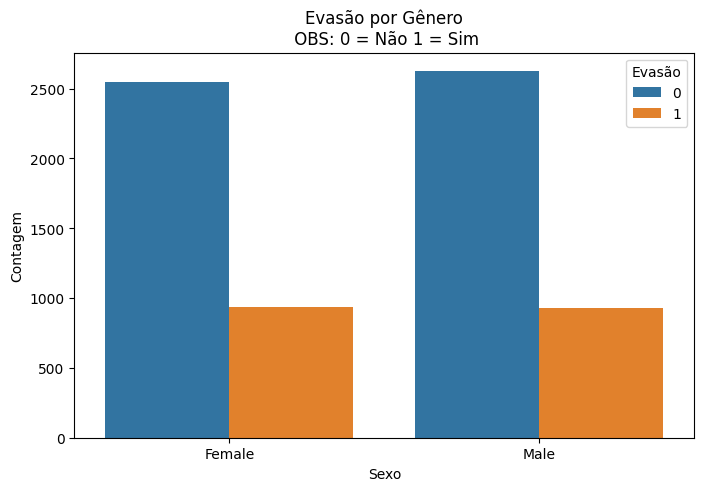

In [198]:
# Gráfico de barras de evasão por gênero
plt.figure(figsize=(8, 5))
sns.countplot(data=telecomDF, x='Sexo', hue='Rotatividade')
plt.title("Evasão por Gênero\n OBS: 0 = Não 1 = Sim")
plt.xlabel("Sexo")
plt.ylabel("Contagem")
plt.legend(title="Evasão")
plt.show()

Gráfico evasão por ***tipo de contrato***

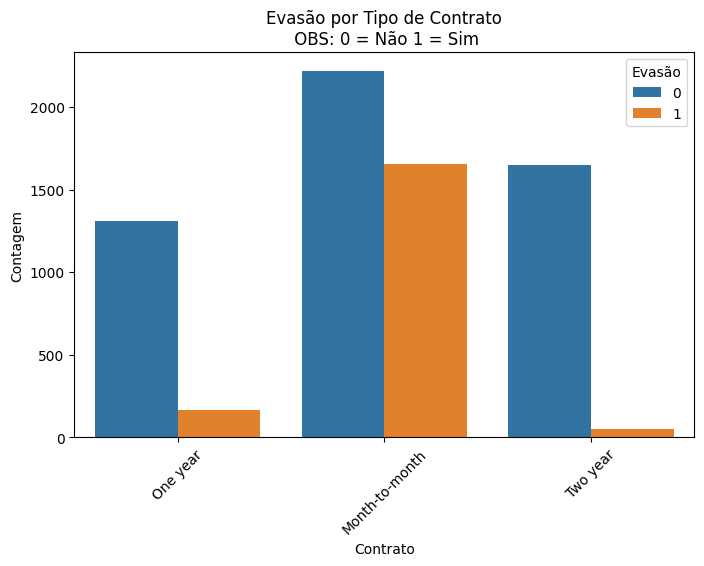

In [199]:
# Gráfico de evasão por tipo de contrato
plt.figure(figsize=(8, 5))
sns.countplot(data=telecomDF, x='Contrato', hue='Rotatividade')
plt.title("Evasão por Tipo de Contrato\n OBS: 0 = Não 1 = Sim")
plt.xlabel("Contrato")
plt.ylabel("Contagem")
plt.legend(title="Evasão")
plt.xticks(rotation=45)
plt.show()

Gráfico evasão por ***método de pagamento***

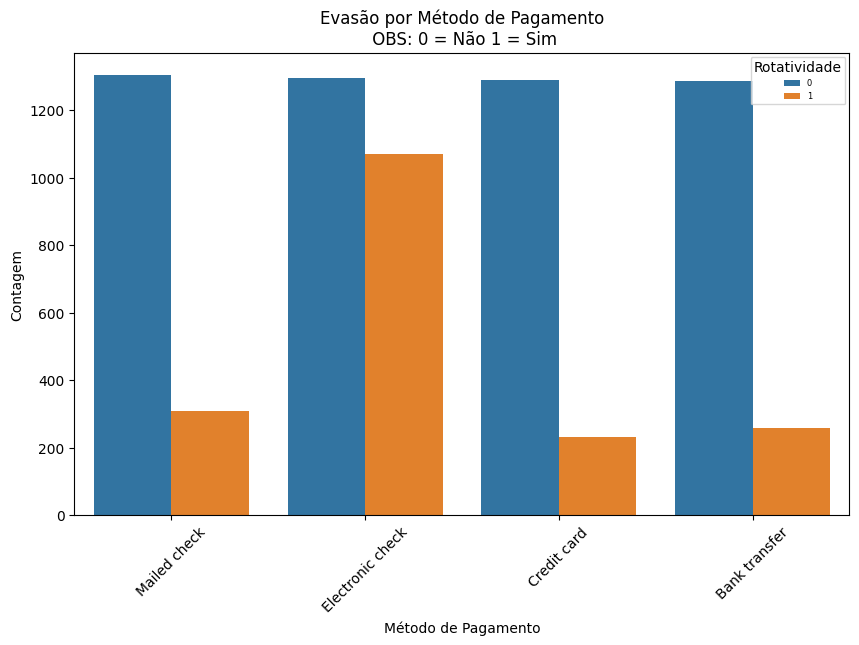

In [200]:
# Gráfico de evasão por tipo de método de pagamento
plt.figure(figsize=(10, 6))
sns.countplot(data=telecomDF, x='MetodoPagamento', hue='Rotatividade')
plt.title("Evasão por Método de Pagamento\n OBS: 0 = Não 1 = Sim")
plt.xlabel("Método de Pagamento")
plt.ylabel("Contagem")
plt.legend(title="Rotatividade", fontsize= 6)
plt.xticks(rotation=45)
plt.show()

Gráfico evasão por ***serviço de internet***

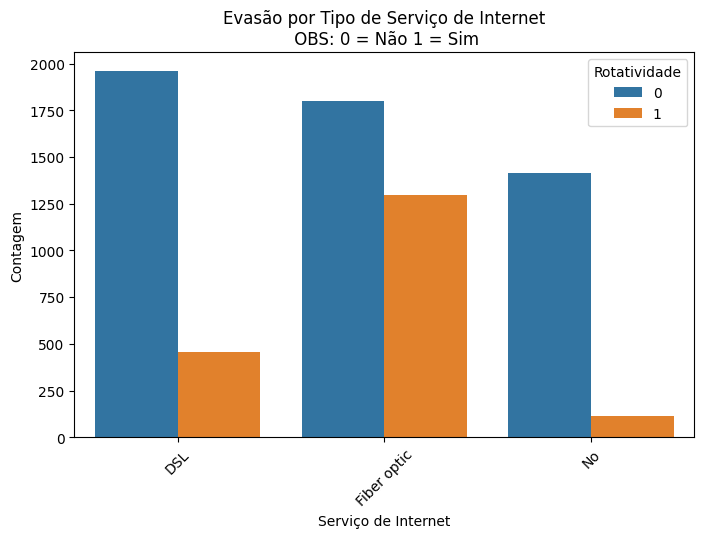

In [201]:
# Gráfico de evasão por tipo de serviço de internet
plt.figure(figsize=(8, 5))
sns.countplot(data=telecomDF, x='ServiçoInternet', hue='Rotatividade')
plt.title("Evasão por Tipo de Serviço de Internet\n OBS: 0 = Não 1 = Sim")
plt.xlabel("Serviço de Internet")
plt.ylabel("Contagem")
plt.legend(title="Rotatividade")
plt.xticks(rotation=45)
plt.show()

## Contagem de Evasão por ***Variáveis Numéricas***

Análise da ***evasão*** de clientes em relação ao ***tempo de fidelidade***

In [202]:
# Estatísticas descritivas da evasão por tempo de fidelidade(contrato)
print("\nEstatísticas descritivas de evasão por tempo de fidelidade:")
descritiva = telecomDF.groupby('Rotatividade')['TempoFidelidade'].describe()
print(descritiva)


Estatísticas descritivas de evasão por tempo de fidelidade:
               count       mean        std  min   25%   50%   75%   max
Rotatividade                                                           
0             5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0  72.0
1             1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0


Gráficos de evasão por ***tempo de fidelidade*** (tenure)

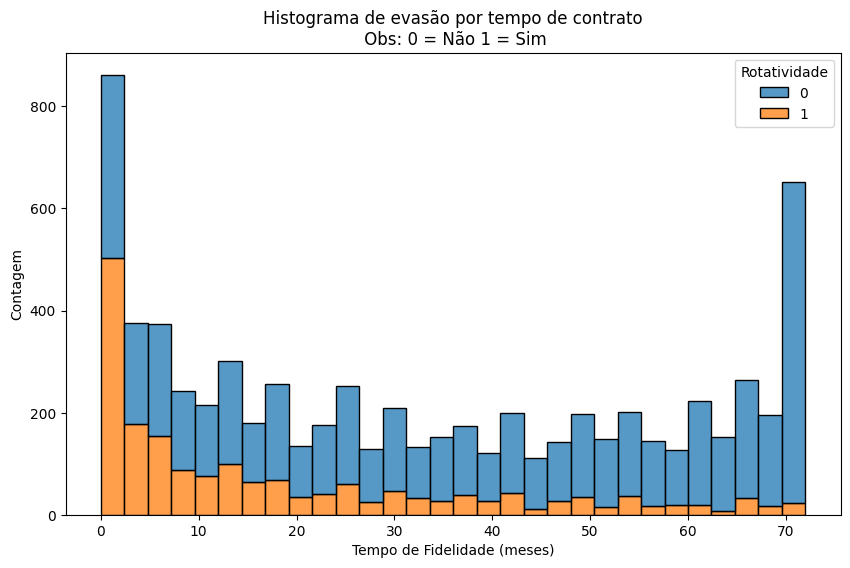

In [203]:
# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(data=telecomDF, x='TempoFidelidade', hue='Rotatividade', multiple='stack', bins=30)
plt.title("Histograma de evasão por tempo de contrato\n Obs: 0 = Não 1 = Sim")
plt.xlabel("Tempo de Fidelidade (meses)")
plt.ylabel("Contagem")
plt.show()

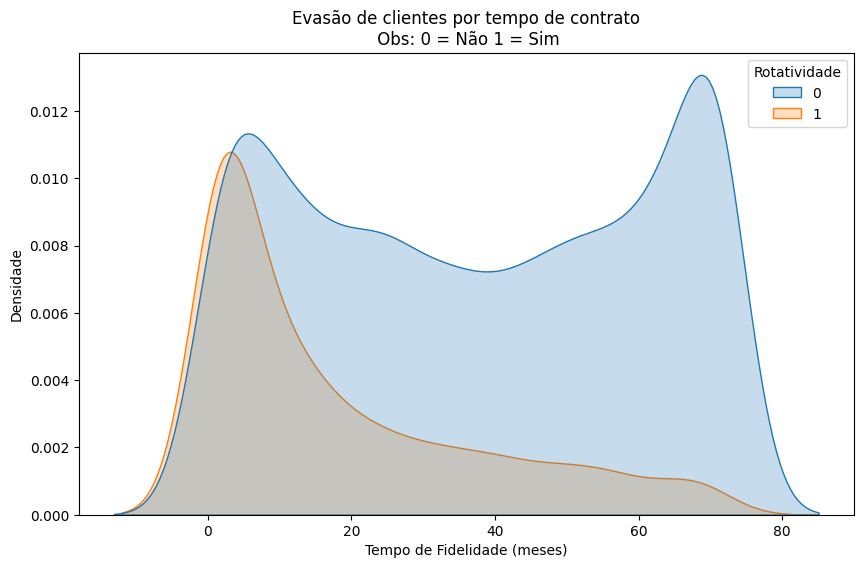

In [204]:
# Gráfico de densidade
plt.figure(figsize=(10, 6))
sns.kdeplot(data=telecomDF, x='TempoFidelidade', hue='Rotatividade', fill=True)
plt.title("Evasão de clientes por tempo de contrato\n Obs: 0 = Não 1 = Sim")
plt.xlabel("Tempo de Fidelidade (meses)")
plt.ylabel("Densidade")
plt.show()

In [205]:
# Gráfico de densidade de evasão de clientes tempo de contrato com Plotly Express

'''
OBS:
- Sim(Yes) = 1
- Nao(No) = 0
'''

fig = px.histogram(
    telecomDF,
    x='TempoFidelidade',
    color='Rotatividade',
    histnorm='density',  # Normaliza para densidade
    nbins=30,  # Número de bins, ajustável conforme a granularidade desejada
    title='Evasão de clientes por tempo de contrato (Tenure)\n Obs: 0 = Não 1 = Sim',
    labels={'TempoFidelidade': 'Tempo de Fidelidade (meses)', 'Rotatividade': 'Rotatividade'},
    opacity=0.5,  # Transparência para sobreposição
    barmode='overlay'  # Sobrepor as densidades
)

# Ajuste do layout
fig.update_layout(
    xaxis_title='Tempo de Fidelidade (meses)',
    yaxis_title='Densidade',
    legend_title='Evasão',
    width=800,
    height=500,
    showlegend=True
)

# Mostrando o gráfico
fig.show()

# RELATÓRIO FINAL

## Relatório final para a empresa Telecom X



Fomos contratados para analisar a empresa Telecom X. A empresa solicitou nosso serviços porque está enfrentando um alto índice de cancelamentos de assinaturas (Churn de Clientes) e quer entender o que os leva a tomar essa decisão.

Para iniciar esse projeto, nós:

- Fizemos importações de bibliotecas úteis para análise da dados. As bibliotecas escolhidas foram: Pandas, Numpy, Seaborn, Matplotlib e Ploty.

- Limpamos os dados do data frame telecomDF: Removemos dados nulos e outros que pudessem atrapalhar a análise de evasão de cliente.

- Tratamos os dados do data frame: Procuramos por inconsistências, fizemos a conversão do tipo de dados de algumas colunas e etc.

Depois de termos tratado todas as necessidades do data frame telecomDF, começamos as análises exploratórias dos dados. Baseado nas informações do data frame, nós criamos gráficos e outras visualizações para identificarmos padrões dos clientes.


Feitas as análises, pudemos observar que:

- Clientes com assinaturas mensais tendem a evadir muito mais se compararmos com os que possuem assinaturas de 1 e 2 anos.

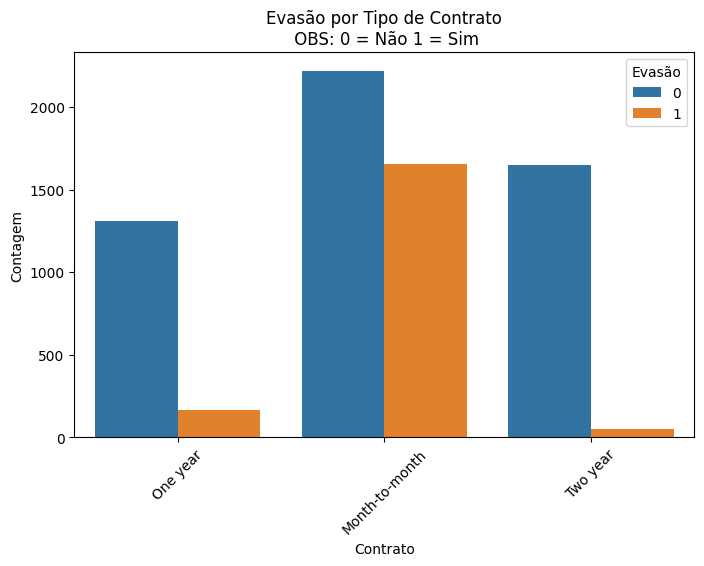

In [206]:
# Visualização - Gráfico de evasão por tipo de assinatura
plt.figure(figsize=(8, 5))
sns.countplot(data=telecomDF, x='Contrato', hue='Rotatividade')
plt.title("Evasão por Tipo de Contrato\n OBS: 0 = Não 1 = Sim")
plt.xlabel("Contrato")
plt.ylabel("Contagem")
plt.legend(title="Evasão")
plt.xticks(rotation=45)
plt.show()

- Clientes que utilizam método de pagamento "cheque eletrônico" tendem a evadir muito mais se compararmos com os que escolheram "cheque por e-mail", "cartão de crédito" e "transferência bancária."

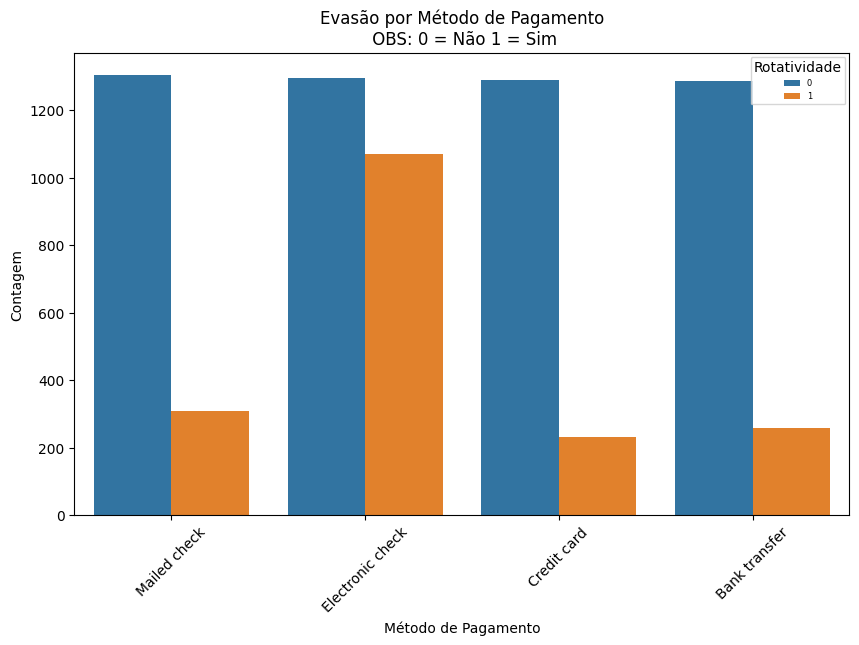

In [207]:
# Visualização - Gráfico de evasão por tipo de método de pagamento
plt.figure(figsize=(10, 6))
sns.countplot(data=telecomDF, x='MetodoPagamento', hue='Rotatividade')
plt.title("Evasão por Método de Pagamento\n OBS: 0 = Não 1 = Sim")
plt.xlabel("Método de Pagamento")
plt.ylabel("Contagem")
plt.legend(title="Rotatividade", fontsize= 6)
plt.xticks(rotation=45)
plt.show()

- Clientes que utilizam serviço de internet do tipo "fibra ótica" tendem a evadir muito mais se compararmos com os que escolheram "DSL" ou "nenhum serviço de internet".

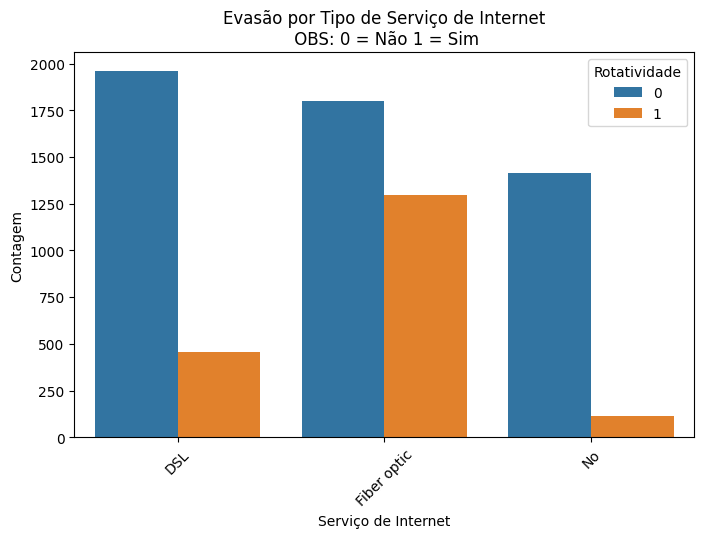

In [208]:
# Gráfico de evasão por tipo de serviço de internet
plt.figure(figsize=(8, 5))
sns.countplot(data=telecomDF, x='ServiçoInternet', hue='Rotatividade')
plt.title("Evasão por Tipo de Serviço de Internet\n OBS: 0 = Não 1 = Sim")
plt.xlabel("Serviço de Internet")
plt.ylabel("Contagem")
plt.legend(title="Rotatividade")
plt.xticks(rotation=45)
plt.show()

- "Clientes que possuem tempo de contrato maior que 70 meses tendem a evadir muito menos se compararmos, por exemplo, com os que possuem tempo de contrato igual ou menor do que 40 meses."

In [209]:
# Gráfico de densidade de evasão de clientes tempo de contrato com Plotly Express

'''
OBS:
- Sim(Yes) = 1
- Nao(No) = 0
'''

fig = px.histogram(
    telecomDF,
    x='TempoFidelidade',
    color='Rotatividade',
    histnorm='density',  # Normaliza para densidade
    nbins=30,  # Número de bins, ajustável conforme a granularidade desejada
    title='Evasão de clientes por tempo de contrato (Tenure)\n Obs: 0 = Não 1 = Sim',
    labels={'TempoFidelidade': 'Tempo de Fidelidade (meses)', 'Rotatividade': 'Rotatividade'},
    opacity=0.5,  # Transparência para sobreposição
    barmode='overlay'  # Sobrepor as densidades
)

# Ajuste do layout
fig.update_layout(
    xaxis_title='Tempo de Fidelidade (meses)',
    yaxis_title='Densidade',
    legend_title='Evasão',
    width=800,
    height=500,
    showlegend=True
)

# Mostrando o gráfico
fig.show()

Mediante tudo o que foi analisado na empresa, minhas sugestões para redução do cancelamento de assinaturas por parte dos clientes da Telecom X são:

1 - Criar um "plano atrativo" para assinaturas do tipo mensal, visto que os clientes que optam por esse tipo de assinatura tendem a cancelar o contrato rapidamente.

2 - Excluir opção de assinatura por "cheque eletrônico".

3 - Procurar outras alternativas de serviços de internet para, talvez, substituir os de tipo "fibra ótica."

4 - "Criar algum plano de assistências ou acompanhamentos anuais de até 3 anos para novos clientes, visto que a taxa de evasão é alta para clientes com tempo de contrato menor que 40 meses."

Agradecemos a oportunidade e esperamos que a empresa Telecom X possa utilizar nossos insights para crescer cada vez mais.

### ***Salvando*** dados do Telecom X

In [210]:
# Salvar o DataFrame como CSV no ambiente do Colab
telecomDF.to_csv('telecomDF.csv', index=False)